In [1]:
import os
import glob
import random
import shutil
from tempfile import gettempdir
from IPython.display import clear_output, Image
from torchvision.datasets.folder import pil_loader
from model import Net
from utils import pil_to_model_tensor_transform
import consts

# UTKFace constants

MALE = 0
FEMALE = 1

WHITE = 0
BLACK = 1
ASIAN = 2
INDIAN = 3
OTHER = 4

# User constants

dset_path = os.path.join('.', 'data', 'UTKFace', 'unlabeled')
tempdir = gettempdir()

In [10]:
consts.NUM_Z_CHANNELS = 100  # we have two trained models, with 50 and 100
net = Net()
load_path = {50: r".\trained_models\2018_09_08\01_44\epoch76", 100: r"C:\Users\Mattan\Downloads\epoch_200_no_tf"}[consts.NUM_Z_CHANNELS]
net.load(load_path, slim=True)  # slim tells the net to load only the encoder and generator

[11_37] Loaded E, G from C:\Users\Mattan\Downloads\epoch_200_no_tf


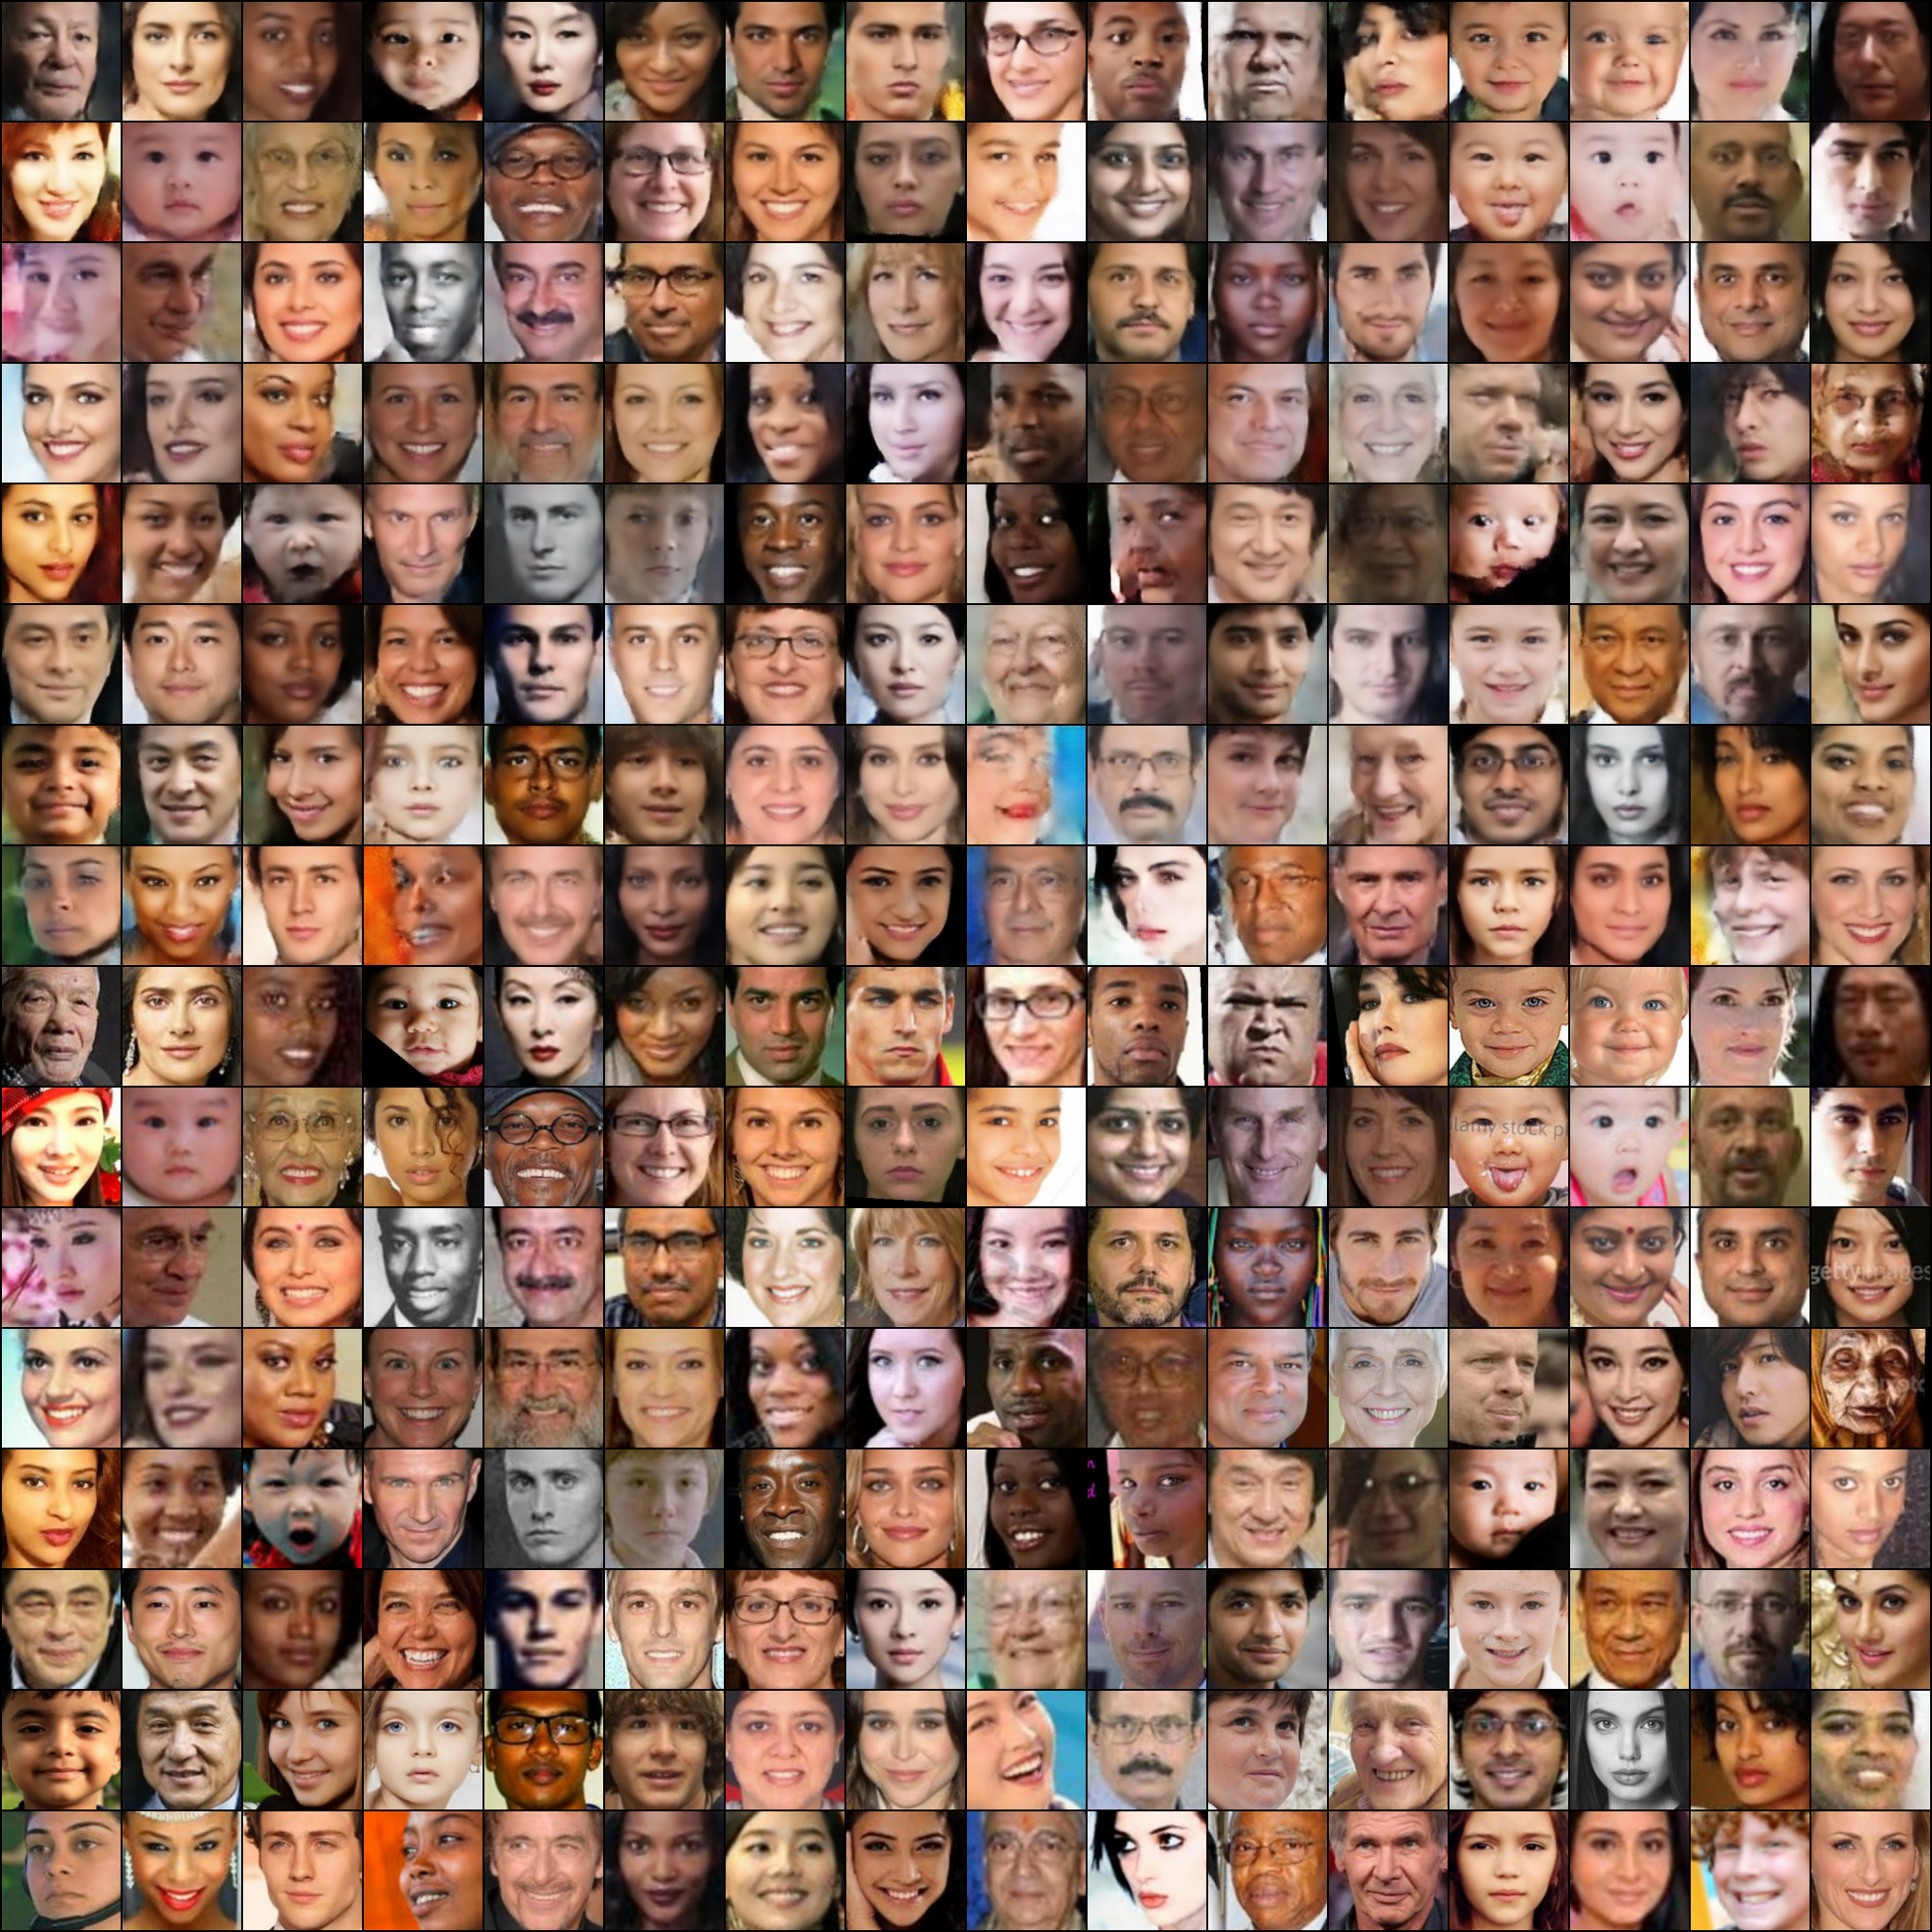

In [11]:
# Validation set results: Lower rows are the originals, Upper rows were reconstrcuted by the net
Image(filename=os.path.join(load_path, 'validation.png'))

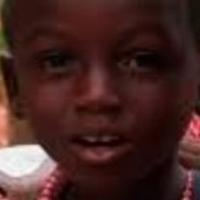

In [5]:
# Game 1: Age Progression/Regression
# Set the attributes of a random person you want to test
age = 5
gender = MALE
race = BLACK

image_path = random.choice(glob.glob(os.path.join(dset_path, '{a}_{g}_{r}*'.format(a=age, g=gender, r=race))))
Image(filename=image_path)  # Will select and show a person with the attributes you selected

[11_38] Saved test result to C:\Users\Mattan\AppData\Local\Temp\menifa.png


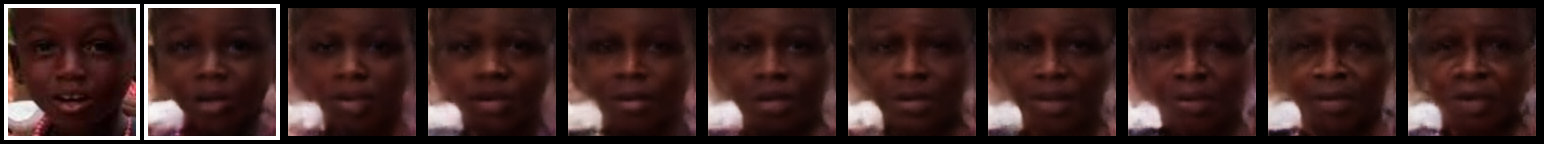

In [12]:
# Game 1: Age Progression/Regression
image_tensor = pil_to_model_tensor_transform(pil_loader(image_path))
Image(filename=net.test_single(image_tensor=image_tensor, age=age, gender=gender, target=tempdir, watermark=False))